## Group 8

Michelle Pathrose, Sana Ali, Anya Solanki, Shana Soyfer, Erica Yang

DS 2500

Health Equity: An Examination of Insulin Access

This code aims to visualize the rate of no health insurance and the rate of diabetes across Continental US.

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np
import matplotlib.patches as mpatches
DIABETES = 'diabetes_map.csv'
MAP = 'us_county_latlng.csv'

In [164]:
def clean_diabetes(filename):
    """
    Look at the diabetes US data and extract only necessary information
    Parameters - filename: the variable for the file
    Return - diabetes_atlas: a dataframe on diabetes rates, health insurance, and FIPS codes
    """
    diabetes_atlas = pd.read_csv(filename)
    # remove a column
    diabetes_atlas = diabetes_atlas.drop(['Year'], axis = 1)
    diabetes_atlas = diabetes_atlas.drop(['State'], axis = 1)
    diabetes_atlas = diabetes_atlas.drop(['County'], axis = 1)
    # make sure fip codes are 5 digits  
    diabetes_atlas['County_FIPS'] = diabetes_atlas['County_FIPS'].astype(str).str.zfill(5)
    diabetes_atlas.drop(diabetes_atlas[diabetes_atlas['No Health Insurance'] == 'No Data'].index, inplace = True)
    # change values to integers
    diabetes_atlas['No Health Insurance'] = pd.to_numeric(diabetes_atlas['No Health Insurance'], errors = 'coerce')
    diabetes_atlas['No Health Insurance'] = diabetes_atlas['No Health Insurance'].astype(int)
    diabetes_atlas['Diagnosed Diabetes Percentage'] = diabetes_atlas['Diagnosed Diabetes Percentage'].astype(int)
    
    return diabetes_atlas

In [186]:
def clean_map(filename):
    """
    Look at the county US latitude, longitude data and return a dataframe with extracted information
    Parameters - filename: the variable for the file
    Return - maps: a dataframe on FIPS codes, latitude and longitude values encoded into 100x150 numbers
    """
    maps = pd.read_csv(filename, header = 1)
    # remove a column
    maps = maps.drop(['name'], axis = 1)
    # make sure fip codes are 5 digits and rename the column  
    maps['fips_code'] = maps['fips_code'].astype(str).str.zfill(5)
    maps.rename(columns = {'fips_code':'County_FIPS'}, inplace = True)
    # Drop values to only focus on continental US
    maps.drop(maps[maps['lng'] < -130].index, inplace = True)
    
    # use the coordinate values to calculate x and y values for 100X 150 numpy array visualization 
    y_percent = (maps['lng'] - (-125.0)) / (-65 - (-125.0))
    maps['y_value'] = y_percent * 150
    maps['y_value'] = maps['y_value'].astype(int)
    maps = maps.drop(['lng'], axis = 1)
    x_percent = (50 - maps['lat']) / (50.0 - 25.0)
    maps['x_value'] = x_percent * 100
    maps['x_value'] = maps['x_value'].astype(int)
    maps = maps.drop(['lat'], axis = 1)
    maps.drop(maps[maps['x_value'] >= 100].index, inplace = True)
    maps.drop(maps[maps['y_value'] >= 150].index, inplace = True)
            
    return maps

In [187]:
def merge_dfs(df1, df2):
    """
    Merge two dataframes into one on a certain column value
    Parameters - d1, d2: variables for the dataframes
    Return - map_diabetes: the merged dataframe
    """
    map_diabetes = pd.merge(df2,df1, on = ['County_FIPS'], left_index = False, right_index = False)
    map_diabetes = map_diabetes.drop(['County_FIPS'], axis = 1)
    return map_diabetes

In [188]:
def plot_us(data):
    """
    A simple scatter plot of US
    parameters - data: a variable for a dataframe
    No return
    """
    plt.scatter(data['y_value'], data['x_value'], color = 'b')
    # plt.savefig('map_usjan28.png')
    plt.show()

In [189]:
def array3d_insurance(data):
    """
    Create a numpy image array visualization of the rates of citizens in counties with no health insurance across the continental US
    Parameters - data: the variable for a dataframe
    No return
    """
    # create a 3D array of zeroes
    temp = np.zeros((100, 150, 3), dtype=int)
    # initiate all values with white RBG values
    for i in range(100):
        for j in range(150):
            temp[i,j] = [255, 255, 255]
    # through iterating through data and reading the coordinate values,
    # create RBG values given percentage intervals
    for ind, row in data.iterrows():
        if  row['No Health Insurance'] < 5:
            temp[row['x_value'], row['y_value']] = [247, 255, 0]
        elif row['No Health Insurance'] >= 5 and row['No Health Insurance'] < 10:
            temp[row['x_value'], row['y_value']] = [255, 222, 0]
        elif row['No Health Insurance'] >= 10 and row['No Health Insurance'] < 15:
            temp[row['x_value'], row['y_value']] = [255, 188, 0]
        elif row['No Health Insurance'] >= 15 and row['No Health Insurance'] < 20:
            temp[row['x_value'], row['y_value']] = [255, 162, 0]
        elif row['No Health Insurance'] >= 20 and row['No Health Insurance'] < 25:
            temp[row['x_value'], row['y_value']] = [255, 122, 0]
        elif row['No Health Insurance'] >= 25 and row['No Health Insurance'] < 30:
            temp[row['x_value'], row['y_value']] = [255, 60, 0]
        elif row['No Health Insurance'] >= 30 and row['No Health Insurance'] < 35:
            temp[row['x_value'], row['y_value']] = [225, 35, 35]
        elif row['No Health Insurance'] >= 35 and row['No Health Insurance'] < 40:
            temp[row['x_value'], row['y_value']] = [188, 0, 0]
        elif row['No Health Insurance'] >= 40:
            temp[row['x_value'], row['y_value']] = [154, 0, 0]   
    
    plt.figure(figsize=(20,20))
    fig, ax = plt.subplots(figsize=(20,20))
    plt.imshow(temp) 
    plt.title('Percentages of People in Counties with No Health Insurance Across the US', fontsize = 30)
    text = "This plot shows surveillance data from the CDC on the rates of people in counties with no health insurance. The different color points associate a certain percentage rate of uninsured people to each county using an approximate degree location that matches the point to axes values in the array."
    plt.text(-25,105, text)
    
    # Create a legend using the RGB values and percentages
    # Code referenced from https://stackoverflow.com/questions/57789191/matplotlib-patches-one-patch-with-mulitple-colors
    colors = [(247, 255, 0), (255, 222, 0), (255, 188, 0), (255, 162, 0), (255, 122, 0), (255, 60, 0), (225, 35, 35), (188, 0, 0), (154, 0, 0)]
    labels = ['x < 5%', '5% < x < 10%', '10% < x < 15%', '15% < x < 20%', '20% < x < 25%', '25% < x < 30%', '30% < x < 35%', '35% < x < 40%', 'x >= 40%'] 
    legend = zip(colors, labels)
    patchList = []
    for (r,g,b), labels in legend:
        data_key = mpatches.Patch(color=[r/255, g/255, b/255], label=labels)
        patchList.append(data_key)
    ax.legend(handles = patchList, loc = 'lower left', fontsize = 16)
    
    plt.savefig('image_array_insurance.png')
    plt.show()

In [190]:
def array3d_diabetes(data):
    """
    Create a numpy image array visualization of health insurance rates across the continental US
    Parameters - data: the variable for a dataframe
    No return
    """
    # create a 3D array of zeroes
    temp = np.zeros((100, 150, 3), dtype=int)
    # initiate all values with white RBG values
    for i in range(100):
        for j in range(150):
            temp[i,j] = [255, 255, 255]
    # through iterating through data and reading the coordinate values,
    # create RBG values given percentage intervals
    for ind, row in data.iterrows():
        if  row['Diagnosed Diabetes Percentage'] < 2:
            temp[row['x_value'], row['y_value']] = [180, 245, 255]
        elif row['Diagnosed Diabetes Percentage'] >= 2 and row['Diagnosed Diabetes Percentage'] < 4:
            temp[row['x_value'], row['y_value']] = [95, 235, 255]
        elif row['Diagnosed Diabetes Percentage'] >= 4 and row['Diagnosed Diabetes Percentage'] < 6:
            temp[row['x_value'], row['y_value']] = [0, 196, 255]
        elif row['Diagnosed Diabetes Percentage'] >= 6 and row['Diagnosed Diabetes Percentage'] < 8:
            temp[row['x_value'], row['y_value']] = [71, 165, 255]
        elif row['Diagnosed Diabetes Percentage'] >= 8 and row['Diagnosed Diabetes Percentage'] < 10:
            temp[row['x_value'], row['y_value']] = [0, 145, 255]
        elif row['Diagnosed Diabetes Percentage'] >= 10 and row['Diagnosed Diabetes Percentage'] < 12:
            temp[row['x_value'], row['y_value']] = [18, 82, 255]
        elif row['Diagnosed Diabetes Percentage'] >= 12 and row['Diagnosed Diabetes Percentage'] < 14:
            temp[row['x_value'], row['y_value']] = [0, 0, 255]
        elif row['Diagnosed Diabetes Percentage'] >= 14 and row['Diagnosed Diabetes Percentage'] < 16:
            temp[row['x_value'], row['y_value']] = [0, 0, 190]
        elif row['Diagnosed Diabetes Percentage'] >= 16:
            temp[row['x_value'], row['y_value']] = [0, 0, 0]
    
    plt.figure(figsize=(20,20))
    fig, ax = plt.subplots(figsize=(20,20))
    plt.imshow(temp) 
    plt.title('Percentages of People in Counties with Diabetes Across the US', fontsize = 30)
    text = "This plot shows surveillance data from the CDC on the rates of people in counties with diabetes. The different color points associate a certain percentage rate of diabetes to each county using an approximate degree location that matches the point to axes values in the array."
    plt.text(-21,105, text)
    
    # Create a legend using the RGB values and percentages
    # Code referenced from https://stackoverflow.com/questions/57789191/matplotlib-patches-one-patch-with-mulitple-colors
    colors = [(180, 245, 255), (95, 235, 255), (0, 196, 255), (71, 165, 255), (0, 145, 255), (18, 82, 255), (0,0,255), (0, 0, 190), (0,0,0)]
    labels = ['x < 2%', '2% < x < 4%', '4% < x < 6%', '6% < x < 8%', '8% < x < 10%', '10% < x < 12%', '12% < x < 14%', '14% < x < 16%','x >= 16%'] 
    legend = zip(colors, labels)
    patchList = []
    for (r,g,b), labels in legend:
        data_key = mpatches.Patch(color=[r/255, g/255, b/255], label=labels)
        patchList.append(data_key)
    ax.legend(handles = patchList, loc = 'lower left', fontsize = 16)
    
    plt.savefig('image_array_diabetes.png')
    plt.show()

   y_value  x_value  Diagnosed Diabetes Percentage  No Health Insurance
0       92       62                              9                   11
1      101       60                              7                   13
2       76       27                              9                    4
3       75       52                              9                   17
4      122       32                              8                    6


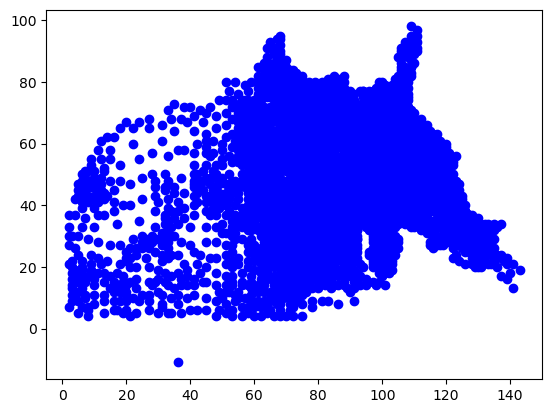

<Figure size 2000x2000 with 0 Axes>

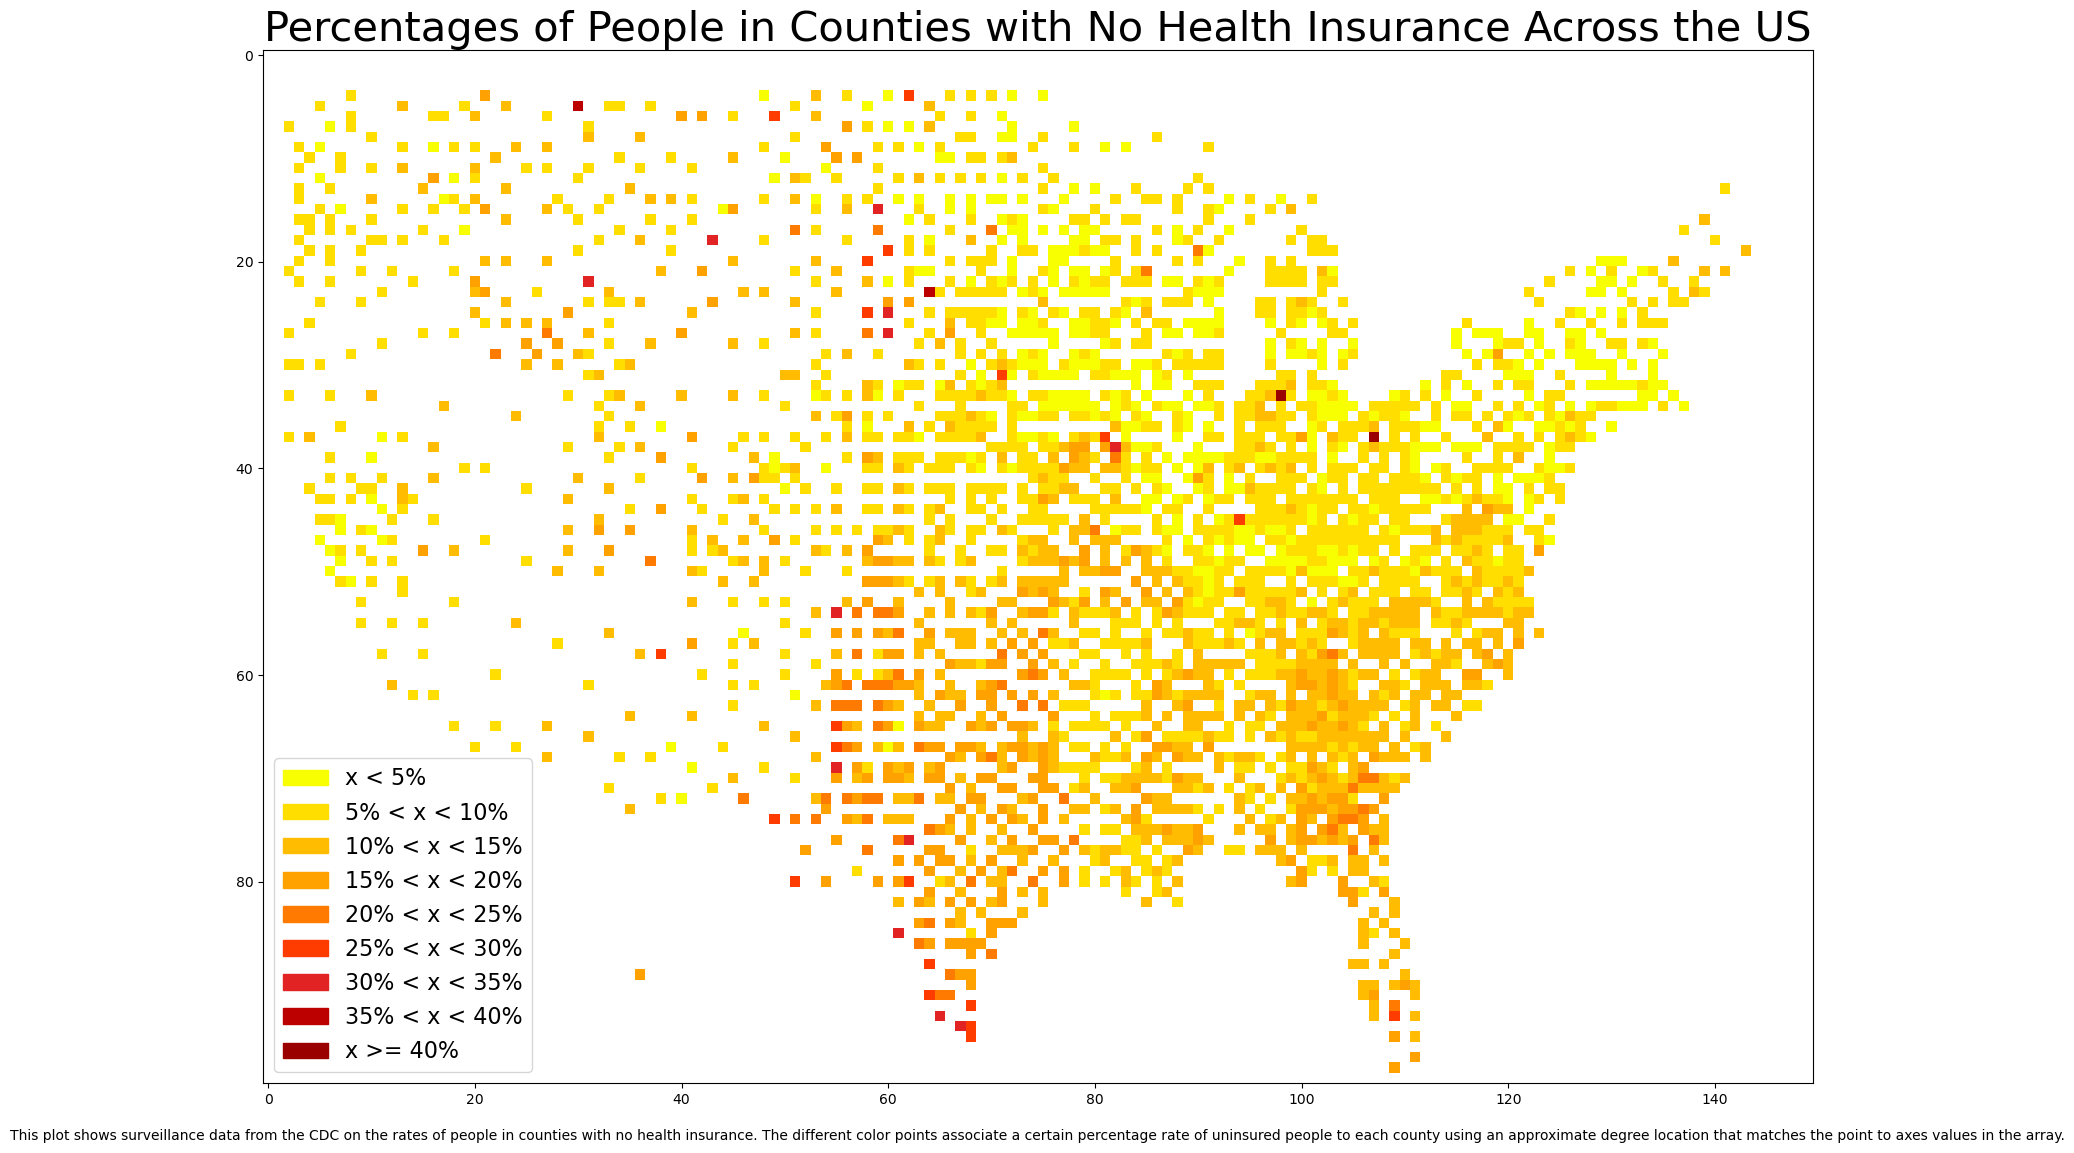

<Figure size 2000x2000 with 0 Axes>

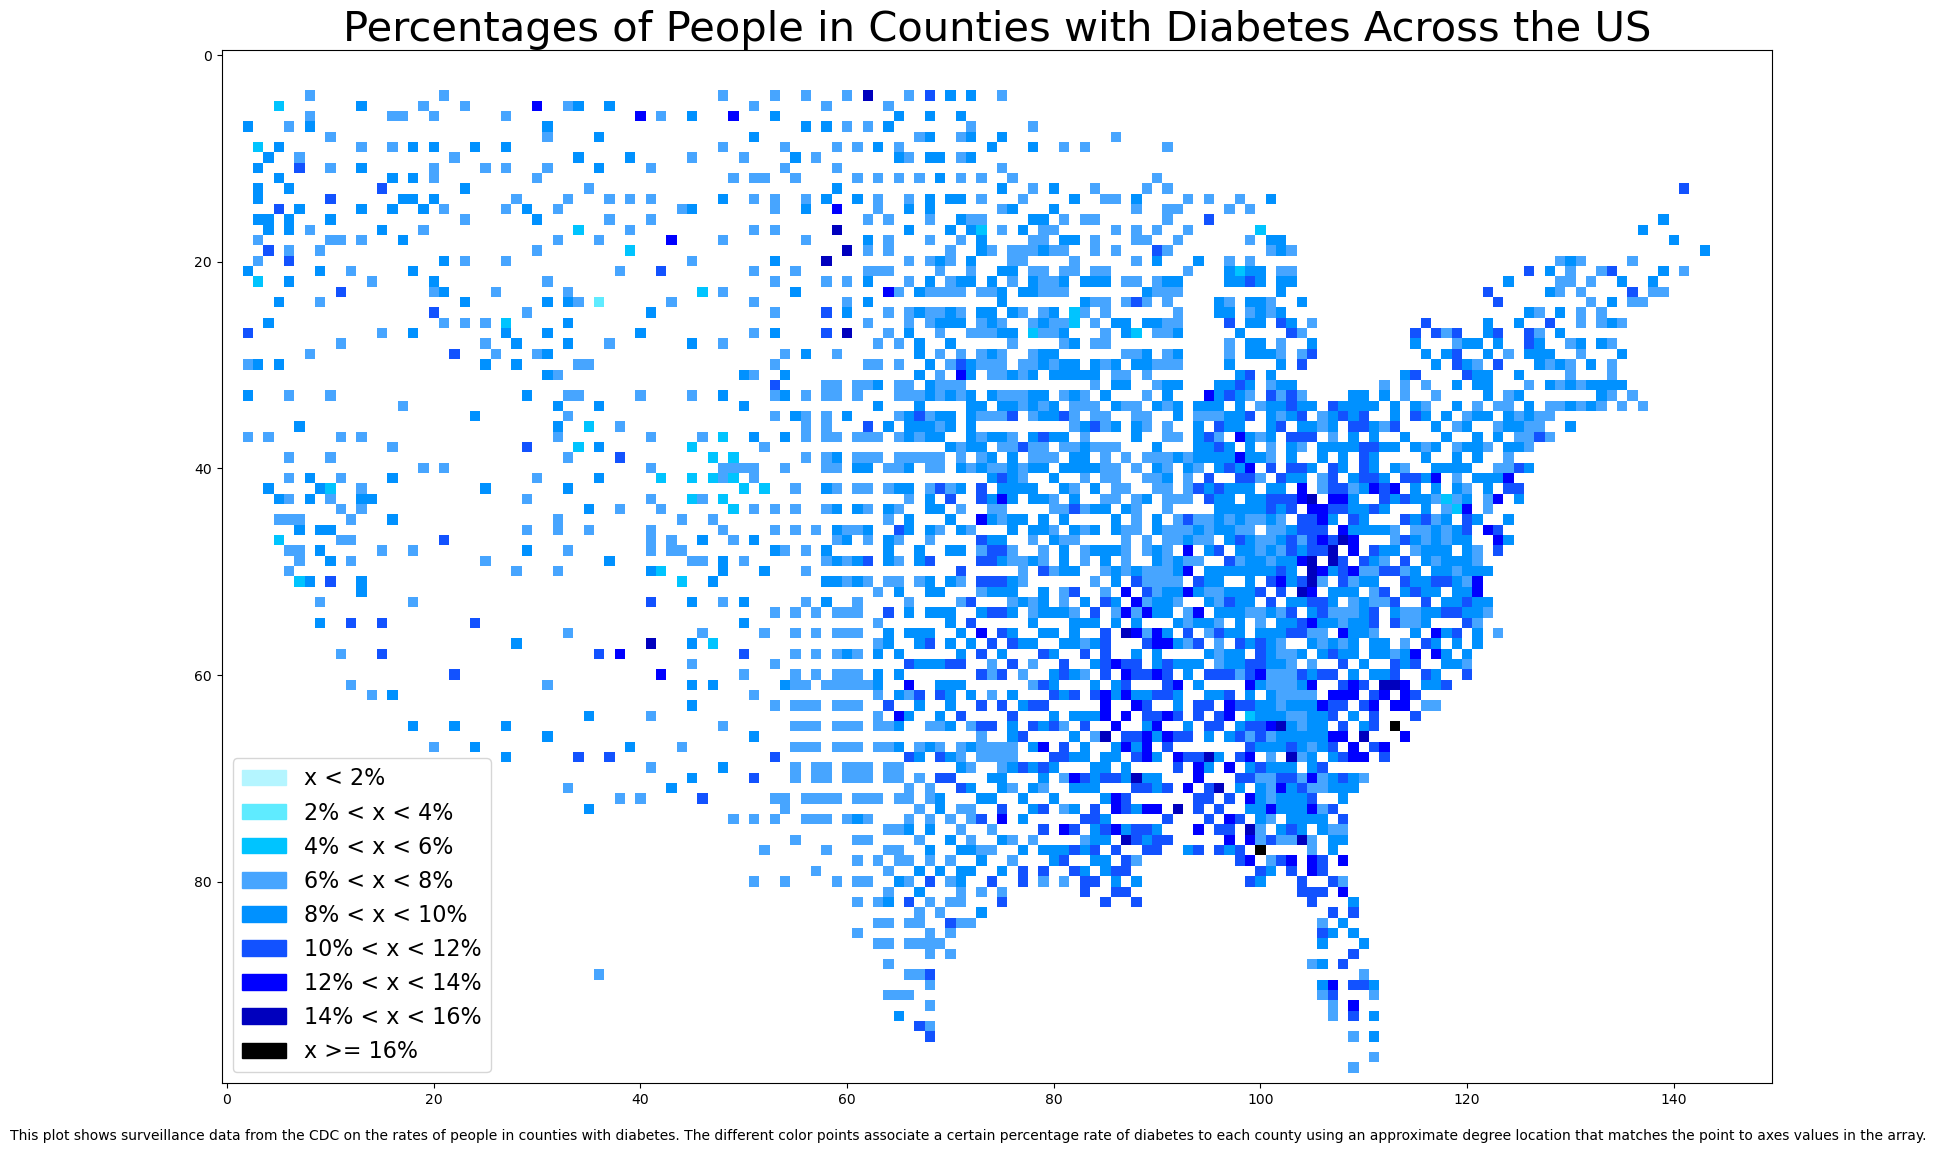

In [191]:
def main():
    diabetes_atlas = clean_diabetes(DIABETES)
    # print(diabetes_atlas)
    maps = clean_map(MAP)
    # print(maps)
    map_diabetes = merge_dfs(diabetes_atlas, maps)
    print(map_diabetes.head())
    us_plot = plot_us(map_diabetes)
    us_array = array3d_insurance(map_diabetes)
    diabetes_array = array3d_diabetes(map_diabetes)
    
if __name__ == '__main__':
    main()    